In [1]:
import networkx as nx
from custom import load_data as cf
from networkx.algorithms import bipartite
from nxviz import CircosPlot
import numpy as np
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

/Users/ericmjl/anaconda/envs/nams/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


# Introduction

Bipartite graphs are graphs that have two (bi-) partitions (-partite) of nodes. Nodes within each partition are not allowed to be connected to one another; rather, they can only be connected to nodes in the other partition.

Bipartite graphs can be useful for modelling relations between two sets of entities. We will explore the construction and analysis of bipartite graphs here.

![bipartite graph](https://upload.wikimedia.org/wikipedia/commons/thumb/e/e8/Simple-bipartite-graph.svg/600px-Simple-bipartite-graph.svg.png)

Let's load a [crime data](http://konect.uni-koblenz.de/networks/moreno_crime) bipartite graph and quickly explore it.

> This bipartite network contains persons who appeared in at least one crime case as either a suspect, a victim, a witness or both a suspect and victim at the same time. A left node represents a person and a right node represents a crime. An edge between two nodes shows that the left node was involved in the crime represented by the right node.

In [2]:
G = cf.load_crime_network()
list(G.edges(data=True))[0:5]

[('p1', 'c1', {'role': 'Suspect'}),
 ('p1', 'c2', {'role': 'Victim'}),
 ('p1', 'c3', {'role': 'Victim'}),
 ('p1', 'c4', {'role': 'Suspect'}),
 ('c1', 'p756', {'role': 'Suspect'})]

In [3]:
list(G.nodes(data=True))[0:10]

[('p1', {'bipartite': 'person', 'gender': 1}),
 ('c1', {'bipartite': 'crime'}),
 ('c2', {'bipartite': 'crime'}),
 ('c3', {'bipartite': 'crime'}),
 ('c4', {'bipartite': 'crime'}),
 ('p2', {'bipartite': 'person', 'gender': 1}),
 ('c5', {'bipartite': 'crime'}),
 ('c6', {'bipartite': 'crime'}),
 ('c7', {'bipartite': 'crime'}),
 ('c8', {'bipartite': 'crime'})]

# Projections

Bipartite graphs can be projected down to one of the projections. For example, we can generate a person-person graph from the person-crime graph, by declaring that two nodes that share a crime node are in fact joined by an edge.

![bipartite graph](https://upload.wikimedia.org/wikipedia/commons/thumb/e/e8/Simple-bipartite-graph.svg/600px-Simple-bipartite-graph.svg.png)

## Exercise

Find the bipartite projection function in the NetworkX `bipartite` module [docs](https://networkx.github.io/documentation/networkx-1.10/reference/algorithms.bipartite.html), and use it to obtain the `unipartite` projection of the bipartite graph. (5 min.)

In [4]:
person_nodes = [n for n in G.nodes() if G.node[n]['bipartite'] == 'person']
pG = bipartite.projection.projected_graph(G, person_nodes)
list(pG.nodes(data=True))[0:5]

[('p1', {'bipartite': 'person', 'gender': 1}),
 ('p2', {'bipartite': 'person', 'gender': 1}),
 ('p3', {'bipartite': 'person', 'gender': 1}),
 ('p4', {'bipartite': 'person', 'gender': 1}),
 ('p5', {'bipartite': 'person', 'gender': 1})]

## Exercise

Try visualizing the person-person crime network by using a Circos plot. Ensure that the nodes are grouped by gender and then by number of connections. (5 min.)

Again, recapping the Circos Plot API:

```python
c = CircosPlot(graph_object, node_color='metadata_key1', node_grouping='metadata_key2', node_order='metadat_key3')
c.draw()
plt.show()  # or plt.savefig('...')
```

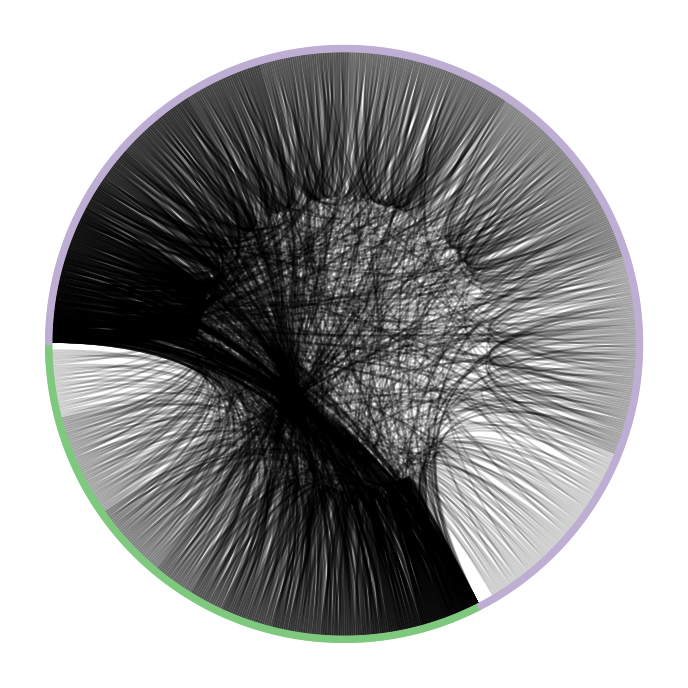

In [5]:
for n, d in pG.nodes(data=True):
    pG.node[n]['connectivity'] = len(list(pG.neighbors(n)))
c = CircosPlot(pG, node_color='gender', node_grouping='gender', node_order='connectivity')
c.draw()
plt.savefig('images/crime-person.png', dpi=300)

## Exercise

Use a similar logic to extract crime links. (2 min.)

In [6]:
crime_nodes = [n for n in G.nodes() if G.node[n]['bipartite'] == 'crime']
cG = bipartite.projection.projected_graph(G, crime_nodes)

## Exercise

Can you plot how the crimes are connected, using a Circos plot? Try ordering it by number of connections. (5 min.)

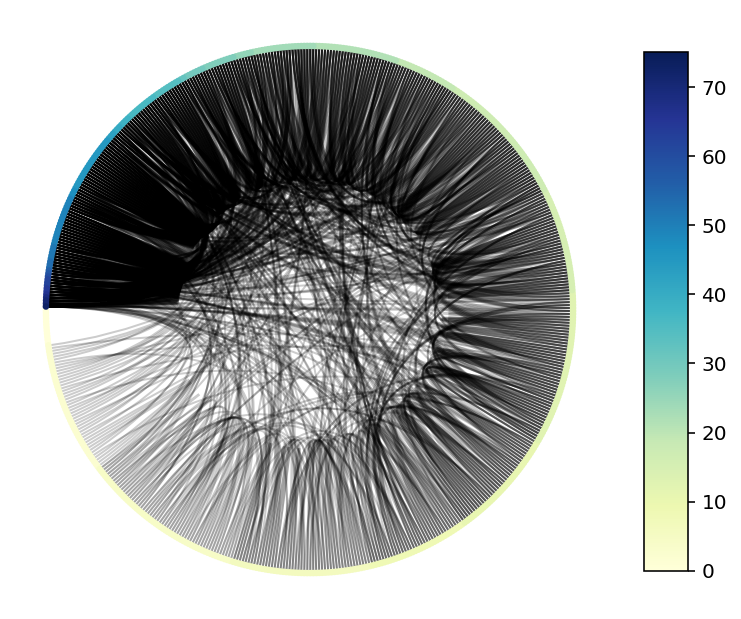

In [7]:
for n in cG.nodes():
    cG.node[n]['connectivity'] = float(len(list(cG.neighbors(n))))
c = CircosPlot(cG, node_order='connectivity', node_color='connectivity')
c.draw()
plt.savefig('images/crime-crime.png', dpi=300)

## Exercise

NetworkX also implements centrality measures for bipartite graphs, which allows you to obtain their metrics without first converting to a particular projection. This is useful for exploratory data analysis. 

Try the following challenges, referring to the [API documentation](https://networkx.github.io/documentation/networkx-1.9/reference/algorithms.bipartite.html) to help you:

1. Which crimes have the most number of people involved?
1. Which people are involved in the most number of crimes?

Exercise total: 5 min.

In [8]:
# Degree Centrality
bpdc = bipartite.degree_centrality(G, person_nodes)
sorted(bpdc.items(), key=lambda x: x[1], reverse=True)[0:5]

[('p815', 0.045372050816696916),
 ('p2', 0.039927404718693285),
 ('p425', 0.032667876588021776),
 ('p220', 0.0308529945553539),
 ('p56', 0.025408348457350273)]

In [9]:
bpdc['p1']

0.007259528130671506

In [10]:
nx.degree_centrality(G)['p1']

0.0029006526468455403